Shape: (30832, 15)
                age        height        weight    total_lift
count  30832.000000  30832.000000  30832.000000  30832.000000
mean      32.123670     68.870005    177.131033   1017.781980
std        7.428352      3.776151     32.387674    278.297178
min       18.000000     52.000000      5.000000      4.000000
25%       27.000000     66.000000    155.000000    805.000000
50%       31.000000     69.000000    178.000000   1040.000000
75%       37.000000     72.000000    197.000000   1224.000000
max       56.000000     83.000000    474.000000   2135.000000


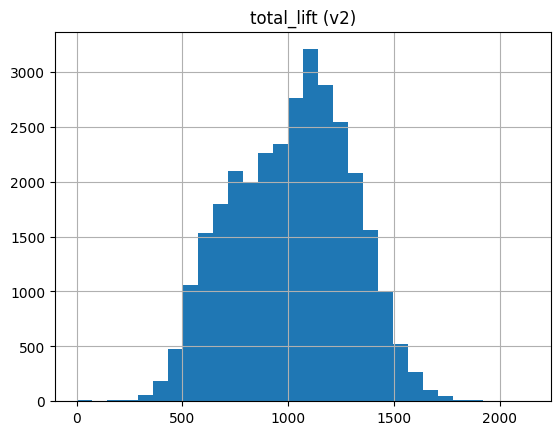

[v2] MAE=163.95  RMSE=207.81  R2=0.448


In [3]:
DATA_VERSION = "v2"
PATHS = {
    "v1": "../data/raw/athletes_v1_with_total.csv",
    "v2": "../data/processed/athletes_v2_with_total.csv",
}
CSV_PATH = PATHS[DATA_VERSION]
RANDOM_STATE = 42
TEST_SIZE = 0.2

import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print(df[['age','height','weight','total_lift']].describe())
df['total_lift'].hist(bins=30); plt.title(f"total_lift ({DATA_VERSION})"); plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

X = df[['age','height','weight']].copy()
y = df['total_lift'].copy()
mask = X.notna().all(axis=1) & y.notna()
X, y = X[mask], y[mask]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
m = LinearRegression().fit(X_tr, y_tr)
pred = m.predict(X_te)

mae  = mean_absolute_error(y_te, pred)
mse  = mean_squared_error(y_te, pred)
rmse = math.sqrt(mse)
r2   = r2_score(y_te, pred)

print(f"[{DATA_VERSION}] MAE={mae:.2f}  RMSE={rmse:.2f}  R2={r2:.3f}")


In [4]:
#NOTE TO SELF: INSERT INTO MY SLIDES
import pandas as pd, math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_path(label, path):
    df = pd.read_csv(path)
    X = df[['age','height','weight']]; y = df['total_lift']
    msk = X.notna().all(axis=1) & y.notna()
    X, y = X[msk], y[msk]
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)
    m = LinearRegression().fit(Xtr, ytr); p = m.predict(Xte)
    mae = mean_absolute_error(yte, p); rmse = math.sqrt(mean_squared_error(yte, p)); r2 = r2_score(yte, p)
    return {"version": label, "MAE": mae, "RMSE": rmse, "R2": r2}

res = pd.DataFrame([
    eval_path("v1", "../data/raw/athletes_v1_with_total.csv"),
    eval_path("v2", "../data/processed/athletes_v2_with_total.csv"),
])
res


,version,MAE,RMSE,R2
0,v1,2331.176695,137931.101901,0.000136
1,v2,163.953538,207.810547,0.447872
